In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def tau(u):
    return -np.log(1-u)

def mu(u):
    return 2*u-1

def phi(u):
    return 2*np.pi*u

In [7]:
def intensity(exited, N_mu=20):
    N_0 = exited.size
    bin_size, intensities, thetas = np.empty(20), np.empty(20), np.empty(20)
    intervals = np.linspace(0,1,21)
    
    for i in range(N_mu):
        mask = (exited < intervals[i+1]) & (exited > intervals[i])
        
        bin_size[i] = exited[mask].size #number of points in bin
        
        N_i = bin_size[i]
        mu_i = (intervals[i+1] - intervals[i])/2 + intervals[i]
        
        intensities[i] = N_i/2/N_mu/mu_i #intensity
        thetas[i] = np.arccos(mu_i) #exit angle
        
    return bin_size, intensities, thetas

def RT(m, p, z_max=1, tau_max=10, prob=1, nsteps=100, bins=20, animate=False, verbose=False):
    x, y, z = np.zeros(*m.shape), np.zeros(*m.shape), np.zeros(*m.shape)
    mu_exited = np.empty(0)
    
    if animation:
        frames = []
        fig = plt.figure(figsize=(8,8))
        plt.set_cmap('nipy_spectral')

    for i in range(nsteps):
        t = tau(np.random.rand(*m.shape))
        L = t*z_max/tau_max
        theta = np.arccos(m)
        
        x = x + L*np.sin(theta)*np.cos(p)
        y = y + L*np.sin(theta)*np.sin(p)
        z = z + L*np.cos(theta)
        
        if animate:
            imgplot = plt.scatter(y, z),
            frames.append(imgplot)
        
        exited_mask = z > z_max
        if np.sum(exited_mask) > 0: mu_exited = np.append(mu_exited, m[exited_mask])
        
        dead_mask = np.random.rand(*m.shape) <= prob
        dead_mask |= exited_mask 
        dead_mask |= z < 0
        
        x[dead_mask] = 0
        y[dead_mask] = 0
        z[dead_mask] = 0
        
        m, p = mu(np.random.rand(*m.shape)), phi(np.random.rand(*m.shape))
    
    if animate:
        ani = animation.ArtistAnimation(fig, frames, interval=300)
        ani.save('animation.mp4')
        plt.show()
        
    if verbose:
        plt.hist(mu_exited, color="#ffb759", ec='black', bins=50)
        plt.show()

    return mu_exited

def RT_optimized(m, p, z_max=1, tau_max=10, prob=1, nsteps=100, bins=20, verbose=False):
    z = np.zeros(*m.shape)
    mu_exited = np.empty(0)

    for i in range(nsteps):
        t = tau(np.random.rand(*m.shape))
        L = t*z_max/tau_max
        theta = np.arccos(m)
        z = z + L*np.cos(theta)

        exited_mask = z > z_max
        if np.sum(exited_mask) > 0: mu_exited = np.append(mu_exited, m[exited_mask])
        
        dead_mask = np.random.rand(*m.shape) <= 1-prob
        dead_mask |= exited_mask 
        dead_mask |= z < 0
        
        z[dead_mask] = 0
        
        m, p = mu(np.random.rand(*m.shape)), phi(np.random.rand(*m.shape))
        
    if verbose:
        %matplotlib inline
        plt.hist(mu_exited, color="#ffb759", ec='black', bins=50)
        plt.show()

    return mu_exited

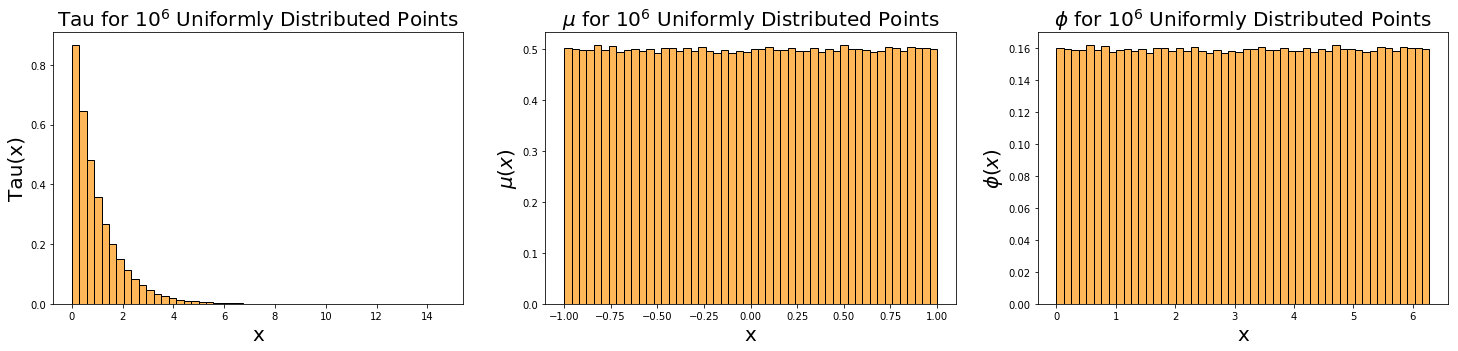

In [16]:
%matplotlib inline
u = np.random.rand(10**6)

fig, ax = plt.subplots(1,3, figsize=(25,5))
ax[0].set_title('Tau for $10^6$ Uniformly Distributed Points', fontsize=20)
ax[0].hist(tau(u), color="#ffb759", ec='black', bins=50, normed=True)
ax[0].set_ylabel('Tau(x)', fontsize=20)
ax[0].set_xlabel('x', fontsize=20)

ax[1].hist(mu(u), color="#ffb759", ec='black', bins=50, normed=True)
ax[1].set_xlabel('x', fontsize=20)
ax[1].set_ylabel('$\mu(x)$', fontsize=20)
ax[1].set_title('$\mu$ for $10^6$ Uniformly Distributed Points', fontsize=20)

ax[2].hist(phi(u), color="#ffb759", ec='black', bins=50, normed=True)
ax[2].set_xlabel('x', fontsize=20)
ax[2].set_ylabel('$\phi(x)$', fontsize=20)
ax[2].set_title('$\phi$ for $10^6$ Uniformly Distributed Points', fontsize=20);


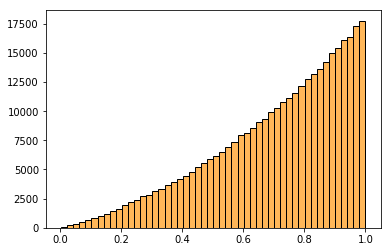

In [8]:
n_particles = 10**6
m, p = mu(np.random.rand(n_particles)), phi(np.random.rand(n_particles))
exited = RT_optimized(m, p, verbose=True)

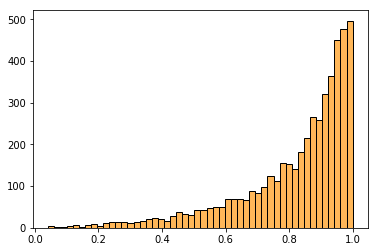

In [19]:
n_particles = 5*10**6
m, p = mu(np.random.rand(n_particles)), phi(np.random.rand(n_particles))
exited = RT_optimized(m, p, prob=0.5, verbose=True)

In [ ]:
# This will take approx. 30 mins to run on an i7-6700HQ with 16 GB of ram.
# If you have less than 9 GB of ram free on your system before running this,
# be extremely wary of runtime since your computer may start swapping.
%matplotlib inline
IwantToWaitAWhile = False
if IwantToWaitAWhile:
    n_particles = 10**8
    m, p = mu(np.random.rand(n_particles)), phi(np.random.rand(n_particles))
    exited = RT_optimized(m, p, verbose=True)
    np.savetxt("exited-prob=1.txt", exited)

In [ ]:
# This will take approx. 30 mins to run on an i7-6700HQ with 16 GB of ram.
# If you have less than 8 GB of ram free on your system before running this,
# be extremely wary of runtime since your computer may start swapping.
%matplotlib inline
IwantToWaitAWhile = False
if IwantToWaitAWhile:
    m, p = mu(np.random.rand(n_particles)), phi(np.random.rand(n_particles))
    exited = RT_optimized(m, p, prob=0.5, verbose=True)
    np.savetxt("exited-prob=0.5.txt", exited)

In [ ]:
# Even loading the files will take several minutes
# due to the size of the files (especially prob=1)
# Be wary if your computer doesn't have ~1gb of ram available
IwantToWaitAWhile = False
if IwantToWaitAWhile:
    exited_prob_1 = np.loadtxt("exited-prob=1.txt")
    exited_prob_half = np.loadtxt("exited-prob=0.5.txt")

In [ ]:
%matplotlib inline
bin_size, intensities, thetas = intensity(exited_prob_1)
thetas = thetas*180/np.pi # Convert from radians to degrees for comparison
theoretical = theoretical_intensity(thetas) # Will normalize to get same normalization constants

#**********Plotting**********
fig, ax = plt.subplots()
width = 1
ax.bar(thetas, theoretical/np.linalg.norm(theoretical), color='r', width=width, label="Theoretical");
ax.bar(thetas+width, intensities/np.linalg.norm(intensities), color='g', width=width, label="Actual");
ax.set_ylabel("Normalized Intensity")
ax.set_xlabel("Exit Angles (degrees)")
ax.set_title("Binned Exiting Photons, Absorbtion Probability 0%")
ax.legend();

In [ ]:
%matplotlib inline
bin_size, intensities, thetas = intensity(exited_prob_half)
thetas = thetas*180/np.pi # Convert from radians to degrees for comparison

#**********Plotting**********
fig, ax = plt.subplots()
width = 1
ax.bar(thetas, intensities/np.linalg.norm(intensities), color='g', width=2)
ax.set_ylabel("Normalized Intensity")
ax.set_xlabel("Exit Angles (degrees)")
ax.set_title("Binned Exiting Photons, Absorbtion Probability 50%");